# SVR Model

In [1]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error ,r2_score 
from statsmodels.tools.eval_measures import rmse
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load and PreProcess 

In [2]:
data = pd.read_csv('data/PMS_data.csv',nrows=100000)

In [3]:
data.head()

,Flow,Occupy,Speed
0,133.0,0.0603,65.8
1,210.0,0.0589,69.6
2,124.0,0.0358,65.8
3,145.0,0.0416,69.6
4,206.0,0.0493,69.4


In [4]:
new_set = data[['Flow','Occupy']].copy()

In [5]:
new_set.head()

,Flow,Occupy
0,133.0,0.0603
1,210.0,0.0589
2,124.0,0.0358
3,145.0,0.0416
4,206.0,0.0493


In [6]:
new_set['Flow'] = np.around(new_set['Flow'])
new_set.head()

,Flow,Occupy
0,133.0,0.0603
1,210.0,0.0589
2,124.0,0.0358
3,145.0,0.0416
4,206.0,0.0493


In [7]:
X = new_set['Occupy'].values

y = new_set['Flow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [8]:
regressor = SVR(kernel = 'rbf', C=1, epsilon= 0.01)
regressor.fit(X_train.reshape(-1,1),y_train)
y_pred = regressor.predict(X_test.reshape(-1,1))

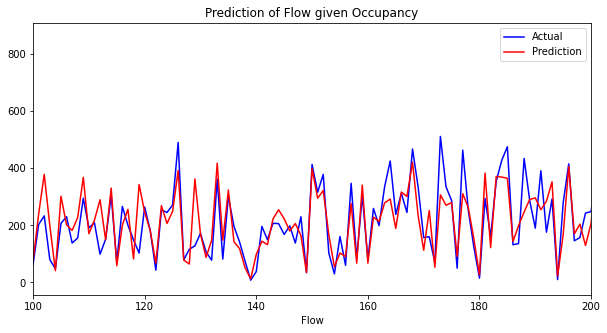

In [9]:
plt.figure(figsize=(10,5))
plt.plot(y_test, color = 'blue',label = "Actual")
plt.xlim(100,200)
plt.plot(y_pred ,color = 'red' ,label = "Prediction")
plt.xlim(100,200)
plt.title('Prediction of Flow given Occupancy')
plt.xlabel('Number of data')
plt.xlabel('Flow')
#plt.savefig('occupy_flow.png')
plt.legend()
plt.show()


In [10]:
score = regressor.score(X_test.reshape(-1,1),y_test)

In [11]:
mse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
r2s = r2_score(y_true=y_test,y_pred=y_pred)

In [12]:
print(score)
print(mse)
print(r2s)

0.6238774497966162
87.35981832386791
0.6238774497966162


In [13]:
data_set = new_set.copy()
data_set.head()

,Flow,Occupy
0,133.0,0.0603
1,210.0,0.0589
2,124.0,0.0358
3,145.0,0.0416
4,206.0,0.0493
